**На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.**

In [58]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [59]:
data = pd.read_excel('AB_Test_Results.xlsx')

In [22]:
data.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [61]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [62]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [63]:
#Избавимся от некорретных строк. Посчитаем, сколько типов встречается у каждого пользователя.

v = data.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})

In [64]:
v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


In [65]:
more_than_one_types = v.query('VARIANT_NAME > 1')

In [66]:
data_new = data[~data.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [67]:
data_new.shape

(6070, 3)

In [68]:
control = data_new.query('VARIANT_NAME == "control"')

test = data_new.query('VARIANT_NAME == "variant"')

In [69]:
len(control)

3026

In [70]:
len(test)

3044

### Проверка данных на нормальность

In [71]:
alpha = 0.05

st = shapiro(df.REVENUE)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]));

Distribution is not normal



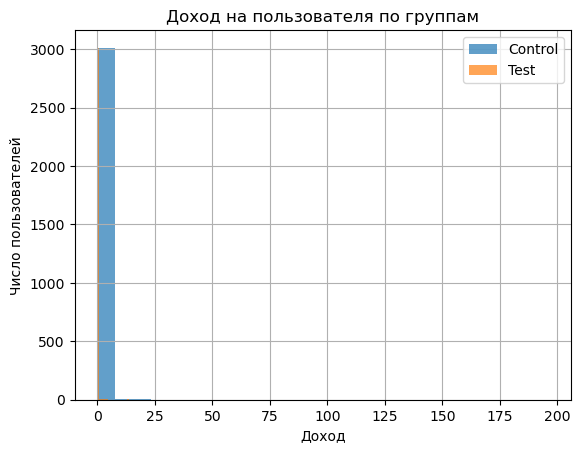

In [72]:
control.REVENUE.hist(bins = 25, alpha =0.7, label='Control')
test.REVENUE.hist(bins = 25, alpha =0.7, label='Test')
plt.title('Доход на пользователя по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

Данные имеют не нормальное распределение

In [73]:
mw_stats = stats.mannwhitneyu(x=data_new[(data_new['VARIANT_NAME'] == 'control')]['REVENUE'].values,
                                                  y=data_new[(data_new['VARIANT_NAME'] == 'variant')]['REVENUE'].values)
mw_stats

MannwhitneyuResult(statistic=4622832.0, pvalue=0.2444173738649208)

**Критерий Манна-Уитни не позволяет нам принять альтернативную гипотезу о разнице в статистической значимости, т.к. p-value > 0.05. Т.е. выкатывать изменения с тестовой группы нецелесообразно.**